In [1]:
# Clone the entire repo.
!git clone https://github.com/amalkoodoruth/pneumonia.git


Cloning into 'pneumonia'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 5850 (delta 0), reused 0 (delta 0), pack-reused 5827
Receiving objects: 100% (5850/5850), 1.13 GiB | 39.56 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (5841/5841), done.


In [2]:
cd pneumonia/

/content/pneumonia


In [0]:
import tensorflow as tf
import numpy as np
# import pandas as pd
DESIRED_ACCURACY = 0.90
ACCEPTABLE_LOSS = 0.25
BATCH_SIZE = 64
image_height = 150
image_width = 150

In [0]:
class mCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('val_acc') >= DESIRED_ACCURACY and logs.get('val_loss') <= ACCEPTABLE_LOSS):
            print("\nReached desired accuracy so cancelling training!")
            self.model.stop_training = True

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.0,
                                   zoom_range=0.1,
                                rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    '/content/pneumonia/train',
    target_size = (image_width, image_height),
    batch_size = BATCH_SIZE,
    class_mode = 'binary')
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/pneumonia/val',
    target_size = (image_width, image_height),
    batch_size = BATCH_SIZE,
    class_mode = 'binary')

Found 4824 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.


In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (image_width,image_height,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [7]:
callbacks = mCallback()
history = model.fit(
    train_generator,
    #steps_per_epoch = 100,
    epochs = 50,
    verbose = 1,
    validation_data = validation_generator,
    #callbacks = [callbacks]
    )
    # model fitting
    # I commented out the callback only to get the data for the graphs
    # In practice, we would stop learning at the end of an epoch where we
    # meet our desired accuracy level and acceptable loss


Epoch 1/50
76/76 [==============================] - 70s 918ms/step - loss: 0.5033 - acc: 0.7825 - val_loss: 0.3555 - val_acc: 0.8533
Epoch 2/50
76/76 [==============================] - 70s 915ms/step - loss: 0.3209 - acc: 0.8682 - val_loss: 0.5464 - val_acc: 0.8002
Epoch 3/50
76/76 [==============================] - 69s 912ms/step - loss: 0.2346 - acc: 0.9019 - val_loss: 0.5214 - val_acc: 0.8219
Epoch 4/50
76/76 [==============================] - 69s 912ms/step - loss: 0.2124 - acc: 0.9181 - val_loss: 0.3810 - val_acc: 0.8346
Epoch 5/50
76/76 [==============================] - 69s 905ms/step - loss: 0.1873 - acc: 0.9260 - val_loss: 0.4980 - val_acc: 0.8179
Epoch 6/50
76/76 [==============================] - 69s 906ms/step - loss: 0.1851 - acc: 0.9264 - val_loss: 0.3580 - val_acc: 0.8543
Epoch 7/50
76/76 [==============================] - 69s 906ms/step - loss: 0.1788 - acc: 0.9320 - val_loss: 0.3694 - val_acc: 0.8533
Epoch 8/50
76/76 [==============================] - 69s 904ms/step - 

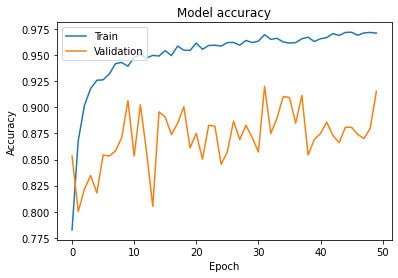

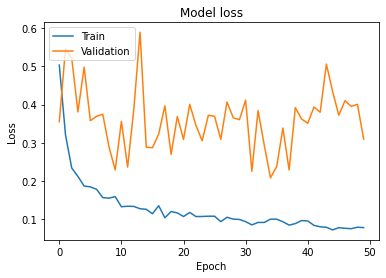

In [8]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()